# M1 CV : TP4

# Histogram Backprojection

Pour cet exercice, votre mission, si vous l'acceptez, sera d'implémenter l'algorithme "Histogram backprojection". Cet algorithme a été proposé par Michael J. Swain , Dana H. Ballard dans leur article "Indexing via color histograms" en 1990.

Cet algorithme est utilisé principalement pour de la segmentation d'image ou pour de la détection d'objets. A partir d'une image et d'une région d'intérêt (Region Of Interest ou ROI), l'histogram backprojection retourne une image de la même taille où chaque pixel correspond à la probabilité que ce pixel appartienne à la région d'intérêt. Cette image est créée grâce à l'analyse des histogrammes 2D de l'image d'entrée et de la ROI, converties en HSV.

La tâche qu'on va réaliser avec histogram backprojection est la segmentation d'images, à savoir la création d'une matrice de même taille que l'image d'entrée, où chaque pixel contient comme valeur la classe de l'objet (exemple en image ci-dessous). Cependant, avec notre algo, on va uniquement segmenter une zone d'intérêt, donc une seule classe d'objet.

<img src="../Base_images/Segmentation.png" style="width: 600px;"/>


In [1]:
# Chargement des librairies
import cv2
from matplotlib import pyplot as plt
import numpy as np
from skimage import io

In [2]:
path_base = 'C:\\Users\\surfaC\\Desktop\\Master SID\\Computer Vision\\Images-20220331\\'

## Partie 1 : Roses are red, Violets are blue...

---
1) Chargez l'image (rose.png) et la ROI (rose_roi.png) en RGB pour la démonstration et affichez-les.

(397, 636, 4)
(120, 110, 3)


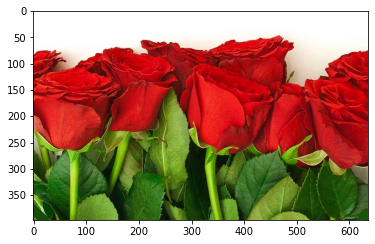

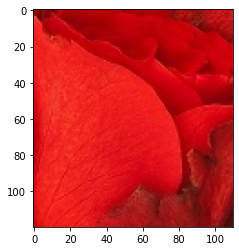

In [3]:
# Chargement et affichage en RGB de l'image à analyser et de la région d'intérêt
img=io.imread(path_base+'rose.png')
roi=io.imread(path_base+'rose_roi.png')
plt.figure(1)
plt.imshow(img)
plt.figure(2)
plt.imshow(roi)
print(img.shape)
print(roi.shape)

Vous l'avez compris : l'objectif sera de détecter les têtes de roses rouges. La ROI est une zone extraite de l'image (au centre).

---
2) Convertissez l'image et la ROI en HSV et affichez les résultats channel par channel (en niveau de gris)

Image initiale
ROI


Text(0.5, 1.0, 'V')

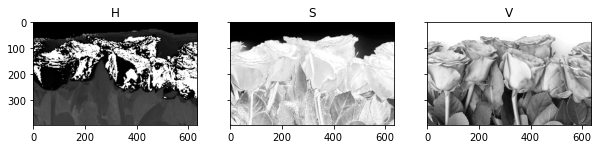

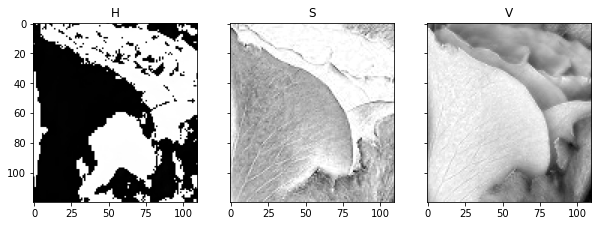

In [4]:
# Conversion HSV et affichage de l'image et de la ROI
img_hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
roi_hsv = cv2.cvtColor(roi, cv2.COLOR_RGB2HSV)
h_img, s_img, v_img = cv2.split(img_hsv)
h_roi, s_roi, v_roi = cv2.split(roi_hsv)

fig, ((ax1, ax2, ax3)) = plt.subplots(ncols=3,nrows=1, figsize=(10, 10), sharex=True,
                                   sharey=True)

print('Image initiale')
ax1.imshow(h_img,cmap='gray')
ax1.set_title('H')
ax2.imshow(s_img,cmap='gray')
ax2.set_title('S')
ax3.imshow(v_img,cmap='gray')
ax3.set_title('V')

print('ROI')

fig, ((ax1, ax2,ax3)) = plt.subplots(ncols=3,nrows=1, figsize=(10, 10), sharex=True,
                                   sharey=True)

ax1.imshow(h_roi,cmap='gray')
ax1.set_title('H')
ax2.imshow(s_roi,cmap='gray')
ax2.set_title('S')
ax3.imshow(v_roi,cmap='gray')
ax3.set_title('V')



---
3) Calculez maintenant les histogrammes 2D de l'image HSV et la ROI HSV, qui s'appeleront respectivement I et M. L' histogramme 2D d'une image est une matrice 2D avec en abscisse les valeurs possibles de l'image sur le channel H, et en ordonnée les valeurs possibles de l'image sur le channel S. Par exemple, un histogramme 2D aura aux coordonnées (x,y) le nombre de pixels de l'image correspondante ayant sur le channel H la valeur x ET sur le channel S la valeur y.

Vous pouvez soit coder la fonction à la main, soit utiliser une fonction qui permet de le calculer.

In [5]:
# Calcul des histogrammes 2D de l'image HSV
idx=img.shape[0]
idy=img.shape[1]
I=np.zeros((180,256))
for i in range(idx):
    for j in range(idy) :
        I[h_img[i,j],s_img[i,j]]=I[h_img[i,j],s_img[i,j]]+1

In [6]:
# Calcul des histogrammes 2D de la ROI HSV
idx=roi.shape[0]
idy=roi.shape[1]
print(idx)
print(idy)
print(np.unique(h_roi))
print(np.unique(s_roi))
M=np.zeros((180,256))

for i in range(idx):
    for j in range(idy):
        M[h_roi[i,j],s_roi[i,j]]=M[h_roi[i,j],s_roi[i,j]]+1

120
110
[  0   1   2   3   4 176 177 178 179]
[155 163 168 169 170 171 176 177 178 179 180 181 182 183 184 185 186 187
 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205
 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223
 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241
 242 243 244 245 246 247 248 249 250 251 252 253 254 255]


*_Checkpoint 1_* : Vous pouvez vérifier que votre histogramme est correct grâce aux vérifications suivantes :
- I[0,0] = 29314
- I[0,255] = 3956
- I.sum() = 252492
- M[0,0] = 0
- M[0,255] = 427
- M.sum() = 13200

In [7]:
# Vérifications de la bonne construction de vos histogrammes 2D
print(I[0,0])
print(I[0,255])
print(I.sum())
print(M[0,0])
print(M[0,255])
print(M.sum())

29314.0
3956.0
252492.0
0.0
427.0
13200.0


In [44]:
#M = cv2.calcHist([roi_hsv],[0, 1], None, [180, 256], [0, 180, 0, 256] )
#I = cv2.calcHist([img_hsv],[0, 1], None, [180, 256], [0, 180, 0, 256] )

---
4) Calculez la matrice de probabilités R = M/I. Il se peut que vous ayez des valeurs incongrues, mais c'est normal, car I peut valoir 0 parfois. Cela n'influencera pas les résultats futurs, mais remplacez ces valeurs par 0.

In [8]:
# Calcul de R
R = M/I

<ipython-input-8-8615e1cdae82>:2: RuntimeWarning: invalid value encountered in true_divide
  R = M/I


In [9]:
# remplacement des Nan
for i in range(R.shape[0]):
    for j in range(R.shape[1]):
        if np.isnan(R[i,j]):
            R[i,j]=0

In [10]:
R

array([[0.        , 0.        , 0.        , ..., 0.11235955, 0.18666667,
        0.10793731],
       [0.        , 0.        , 0.        , ..., 0.03508772, 0.        ,
        0.03401361],
       [0.        , 0.        , 0.        , ..., 0.04545455, 0.        ,
        0.01818182],
       ...,
       [0.        , 0.        , 0.        , ..., 0.18181818, 0.41935484,
        0.24203822],
       [0.        , 0.        , 0.        , ..., 0.17647059, 0.21156373,
        0.21705798],
       [0.        , 0.        , 0.        , ..., 0.09928352, 0.20309478,
        0.19633364]])

---
5) R ici va être utilisée ensuite comme une 'palette'. On va pouvoir construire la matrice B, une image 1 channel de la même taille que notre image à analyser, dont chaque pixel aura comme valeur la probabilité que ce pixel soit de la même classe que la région d'intérêt.

Construisez et affichez maintenant la matrice B, définie grâce à la formule suivante :

\begin{equation*}
B(x,y) = min(R[h(x,y),s(x,y)],1)
\end{equation*} 

avec h et s qui sont respectivement les channels Hue et Saturation de l'image à analyser. 

In [41]:
# Création et affichage de l'image B
idx=img.shape[0]
idy=img.shape[1]
B=np.zeros((idx,idy))
for i in range(R.shape[0]):
    for j in range(R.shape[1]):
        B[i,j]=min(R[i,j],1)

In [42]:
B = R[h_img.ravel(),s_img.ravel()]
B = np.minimum(B,1)
B = B.reshape(img.shape[:2])

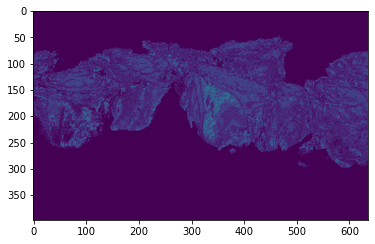

In [43]:
plt.imshow(B)

Si le résultat n'est pas satisfaisant, vous avez la possibilité d'utiliser la fonction OpenCV calcBackProject, où il vous faudra votre image HSV à analyser, et M, l'histogramme de votre ROI en format HSV.

/!\ : Il est fort probable que vous n'ayez pas le même résultat que la version d'OpenCV. Ceci est normal car nous effectuons pas exactement les mêmes opérations que l'algo d'OpenCV. Cependant, l'algorithme d'OpenCV retourne une matrice en uint8, donc il faudra normaliser le résultat pour avoir des valeurs comprises entre 0 et 1.

---
6) Il est l'heure d'appliquer un filtrage sur B. Pour cela, créer un filtre elliptique de taille 5X5 (utilisé habituellement pour la morphologie mathématique), appliquez ce filtre via convolution sur B, normalisez le résultat en uint8 et affichez le résultat.

In [44]:
# A compléter
# Création du filtre elliptique, application de ce dernier sur B, normalisation et affichage du résultat 
disc = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5))
cv2.filter2D(B,-1,disc,B)
B = np.uint8(B)
cv2.normalize(B,B,0,255,cv2.NORM_MINMAX)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

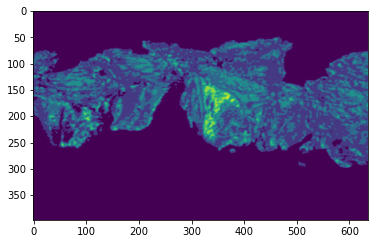

In [45]:
plt.imshow(B)

---
7) Pour finir, appliquez une binarisation sur cette image pour obtenir un masque indiquant les pixels appartenant à la classe de votre ROI. Le seuil sera défini à la main. Affichez le résultat de cette binarisation.

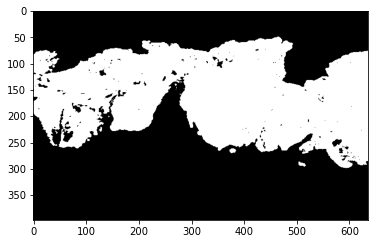

In [46]:
# Binarisation de B puis affichage du masque de sélection créé
retval, mask = cv2.threshold(B, 0, 255, cv2.THRESH_BINARY)

plt.imshow(mask,cmap="gray")

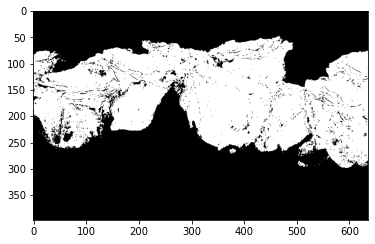

In [47]:
M = cv2.calcHist([roi_hsv],[0, 1], None, [180, 256], [0, 180, 0, 256] )
 
# normalize histogram and apply backprojection
cv2.normalize(M,M,0,255,cv2.NORM_MINMAX)
B2 = cv2.calcBackProject([img_hsv],[0,1],M,[0,180,0,256],1)
retval, dst = cv2.threshold(B2, 0, 255, cv2.THRESH_BINARY)
plt.imshow(dst,cmap="gray")

## Partie 2 : Cassiopée, apprentie influenceuse insta

Cassiopée a un seul objectif : percer sur Insta. Cependant, elle n'a pas encore assez de notorieté pour pouvoir avoir de nombreux partenariats et faire des placements de produits. Elle n'a donc pas assez d'argent pour pouvoir réaliser un shooting photo sur les plages de Dubaï et est donc coincée dans le Poitou-Charentes.

A partir de ce que vous avez implémenté précédemment, appliquez l'histogram backprojection sur la dernière photo de Cassiopée, allongée dans l'herbe (Cassiopee.jpg), et envoyez la à Dubaï avec un subtil montage photo grâce au fond disponible ("Dubai.jpg").

*_Indice :_* Cassiopée est difficile à segmenter... Il faudrait peut-être segmenter tout sauf Cassiopée...

In [48]:
caciopee=io.imread('Cassiopee.jpg')
Dubai=io.imread('Dubai.jpg')

In [49]:
ground=caciopee[250:400,0:150,:]

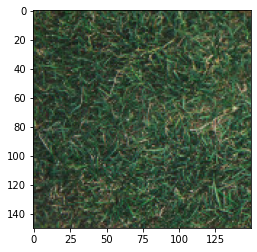

In [50]:
plt.imshow(ground)

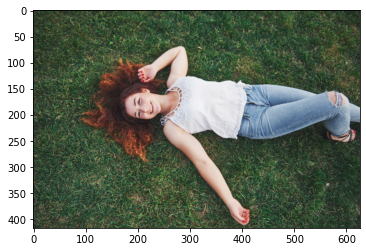

In [51]:
plt.imshow(caciopee)

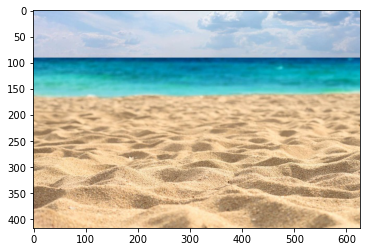

In [52]:
plt.imshow(Dubai)

In [54]:
caciopee_hsv = cv2.cvtColor(caciopee, cv2.COLOR_RGB2HSV)
ground_hsv = cv2.cvtColor(ground, cv2.COLOR_RGB2HSV)

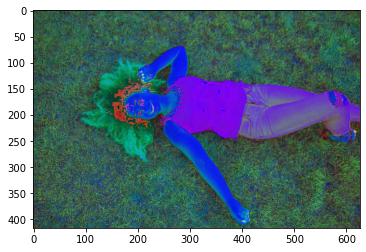

In [55]:
plt.imshow(caciopee_hsv)

In [58]:
M= cv2.calcHist([ground_hsv],[0, 1], None, [180, 256], [0, 180, 0, 256] )
 
# normalize histogram and apply backprojection
cv2.normalize(M,M,0,255,cv2.NORM_MINMAX)
B = cv2.calcBackProject([caciopee_hsv],[0,1],M,[0,180,0,256],1)

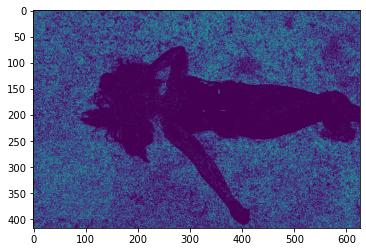

In [59]:
plt.imshow(B)

In [61]:
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
mask = cv2.filter2D(B, -1, kernel,B)
_, mask = cv2.threshold(mask, 100, 255, cv2.THRESH_BINARY) #|cv.THRESH_OTSU
mask = cv2.merge((mask, mask, mask))
result = cv2.bitwise_and(caciopee, mask)

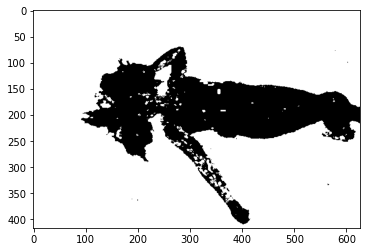

In [89]:
plt.imshow(mask)

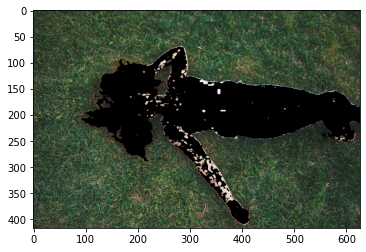

In [62]:
plt.imshow(result)

In [64]:
result2 = cv2.bitwise_and(Dubai,mask)

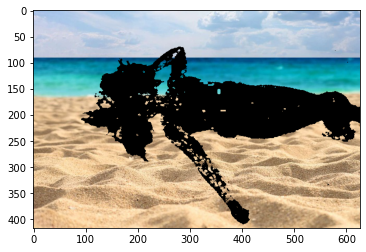

In [90]:
plt.imshow(result2)

In [73]:
mask_inv=cv2.bitwise_not(mask)

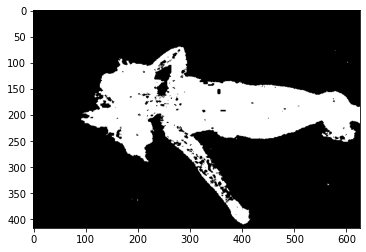

In [74]:
plt.imshow(mask_inv)

In [77]:
mask_caciopee=cv2.bitwise_and(caciopee,mask_inv)

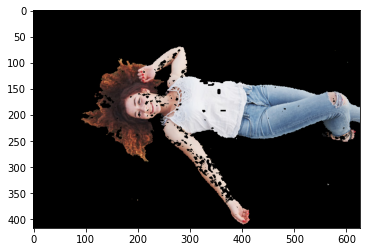

In [97]:
plt.imshow(mask_caciopee)

In [98]:
img_final = cv2.bitwise_or(result2,mask_caciopee)

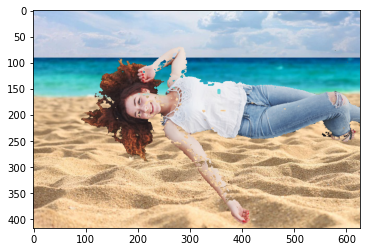

In [99]:
plt.imshow(img_final)